In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
%matplotlib inline

sys.path.append('..')
import functions.trig as trig

sns.set_style("white")
sns.set_context("talk")
blue, green, red, purple = sns.color_palette("deep")[:4]
default_colors = [blue, green, red, purple]

In [2]:
from common_plots import plot_history
ph = plot_history()
# ph = plot_history('/robot_data/calibration/history_leader_calibration.p')
# ph = plot_history('/robot_data/calibration/history_leader_calibration_equal_oppo.p')
# ph = plot_history('/robot_data/history_far_manual_drive.p')
# ph = plot_history('/robot_data/squares/history_ukf_90_fail.p')

start_pt =  2450 # find each time...

In [3]:
# from analyze_past_run import get_state_estimate
# J_est, R_est, angle_est = get_state_estimate(ph.data, 'abc', start_pt)

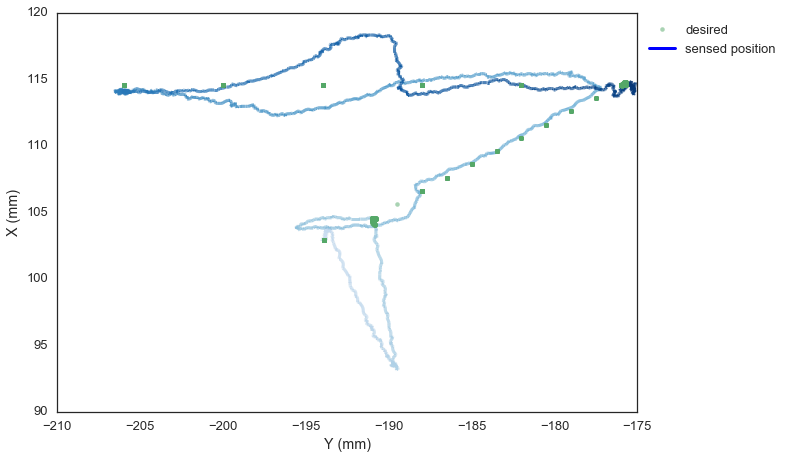

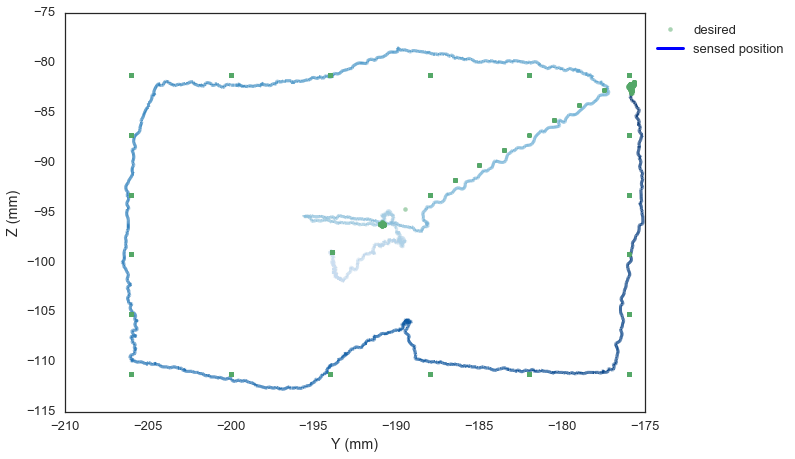

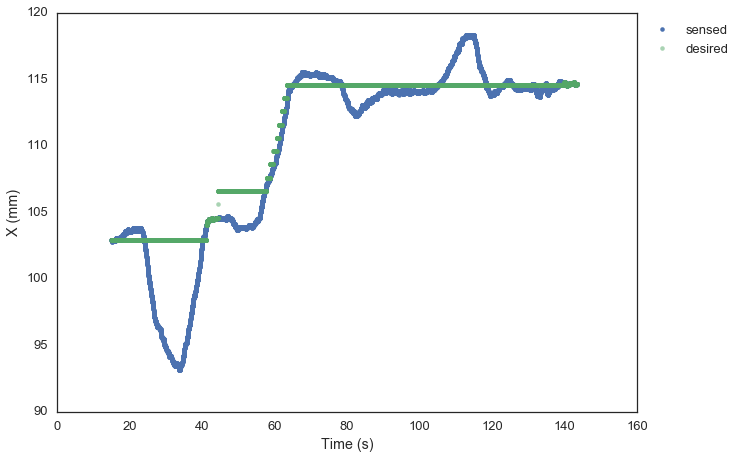

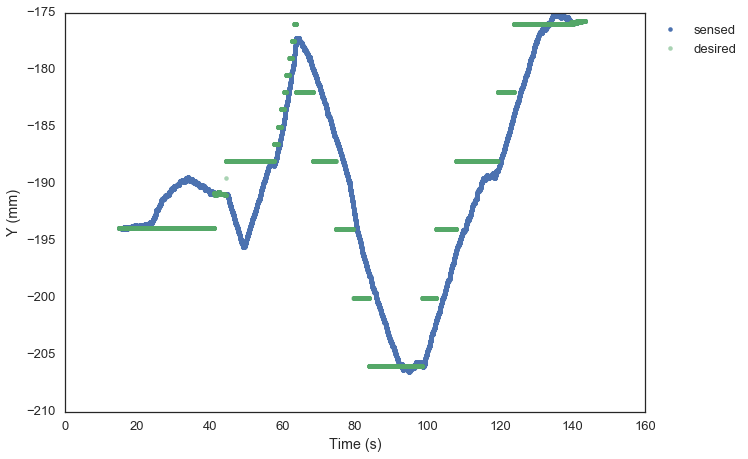

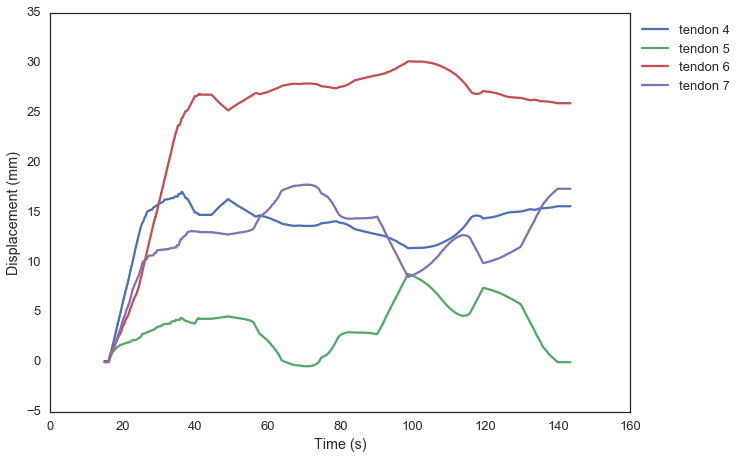

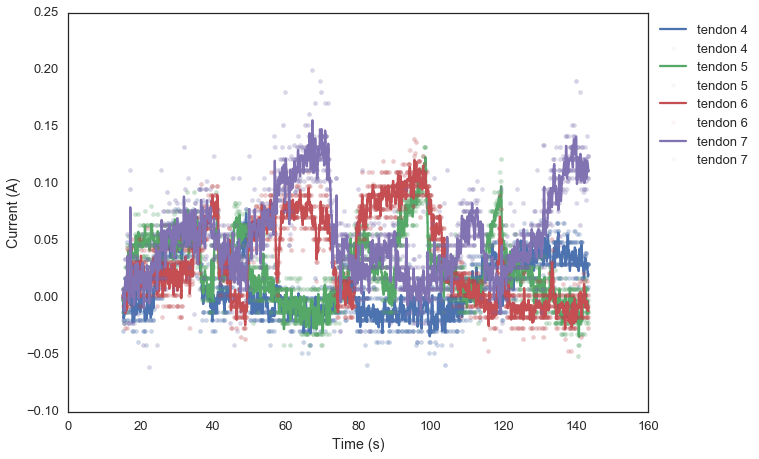

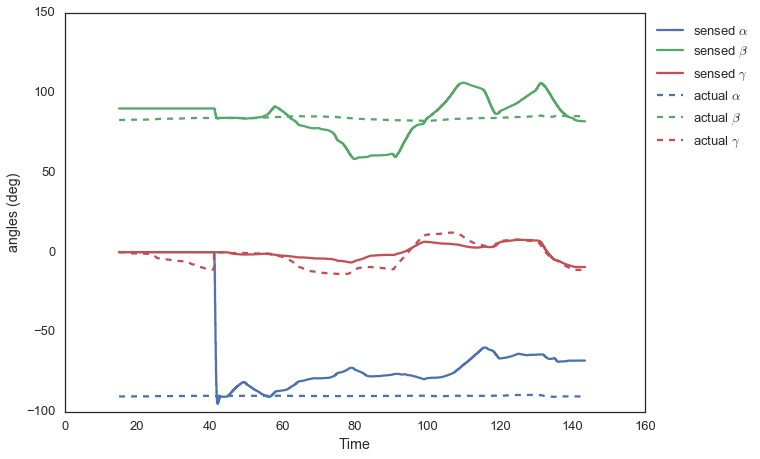

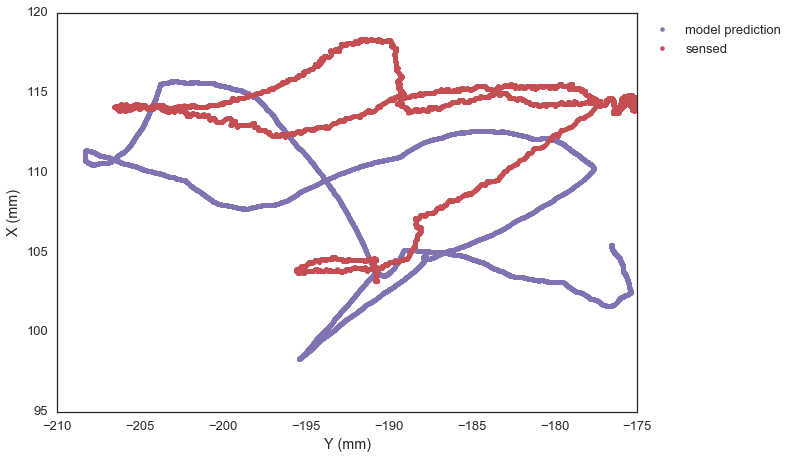

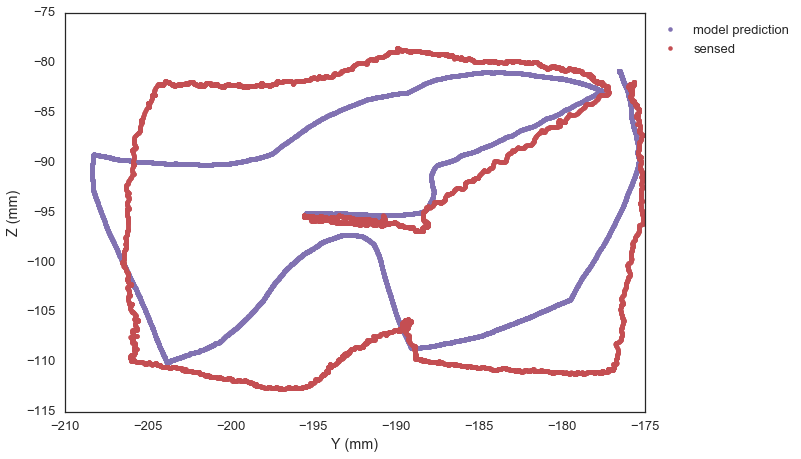

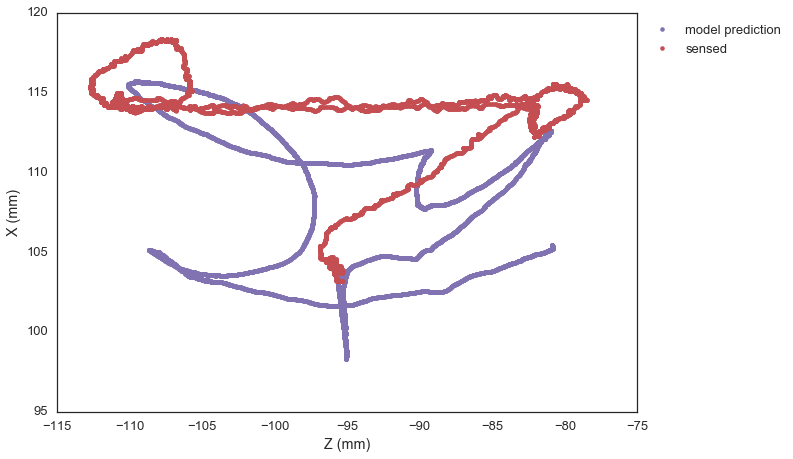

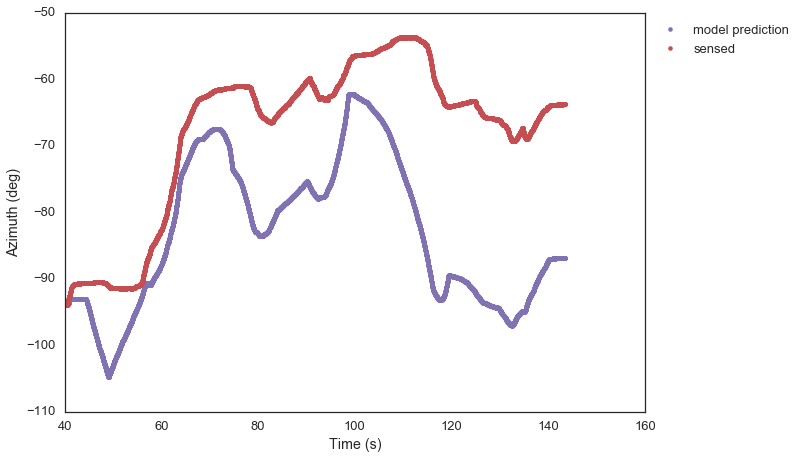

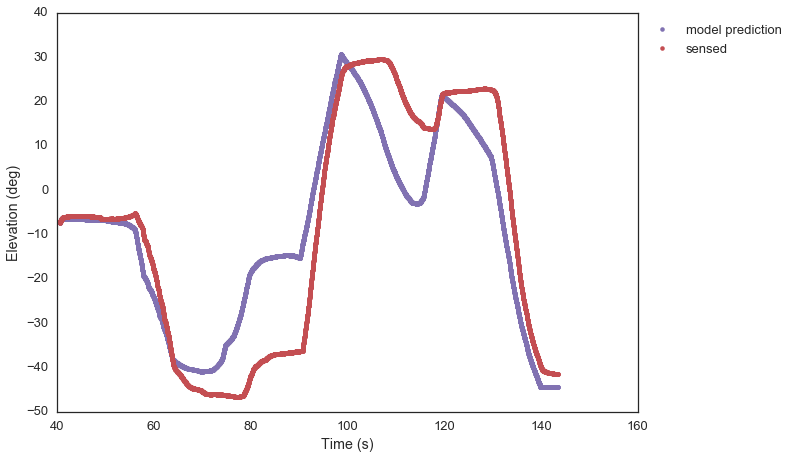

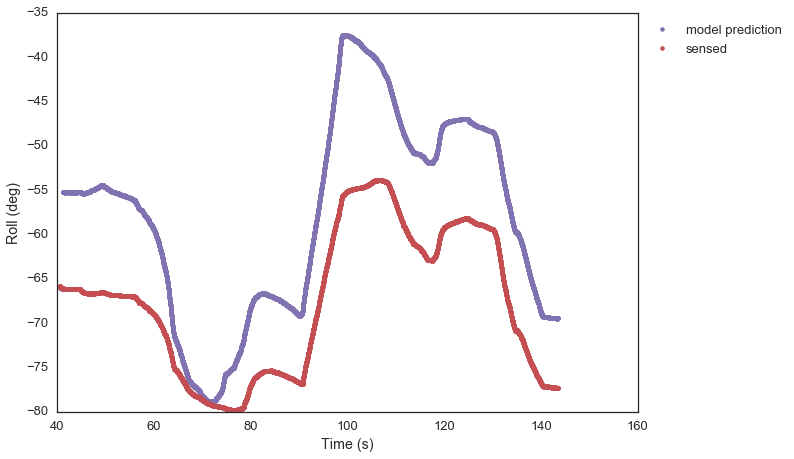

In [4]:
figs_pose = ph.plot_position( xy = True, 
                              yz = True, 
                              xz = False, 
                              xt = True,
                              yt = True,
                              include_desired = True,
                              include_raw = False, 
                              start_pt = 0, 
                              end_pt = -1,
                              alphas = [1., 0.5, 0.1])
figs_leader = ph.plot_leader()
figs_angle  = ph.plot_angles()
# figs_check = ph.check_lung_fit()
# figs_lung = ph.plot_on_lung(xy = True, 
#                             yz = False, 
#                             xz = True, 
#                             include_desired = True,
#                             include_raw = False,
#                             start_pt = start_pt, 
#                             end_pt = -1)
# ph.save_fig(figs_lung[0])
figs_model = ph.plot_model_comparison(xy = True, 
                                     yz = True, 
                                     xz = True, 
                                     a  = True,
                                     e  = True,
                                     r  = True,
                                     include_desired = False,
                                     include_raw = False,
                                     start_pt = start_pt, # when it's tensioned 
                                     end_pt = -1,
                                     alphas = [1., 0.5, 0.1],
                                     adjust_paramters = True)

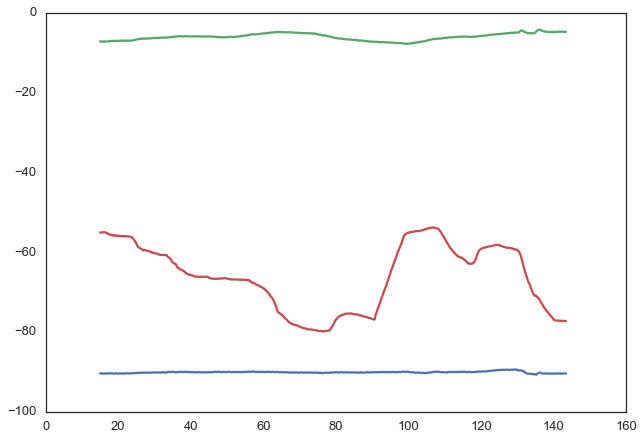

In [5]:
plt.plot(ph.data.time_pts, ph.data.x_guide[:,3:] )

In [6]:
plt.plot(angle_est * 180/np.pi)
for i in range(3):
    plt.plot(ph.data.angles_model[:,i] * 180/np.pi, '--', color = default_colors[i])


NameError: name 'angle_est' is not defined

In [ ]:
plt.plot(ph.data.angles_model[2450:,:])
ph.data.angles_model[2450]

In [ ]:
plt.plot(ph.data.q_desired[start_pt:,4] - ph.data.q_desired[start_pt,4], ph.data.y[start_pt:], label = 'actual')
plt.plot(ph.data.q_desired[start_pt:,4]- ph.data.q_desired[start_pt,4], ph.model_x[start_pt:,1], label = 'model')
plt.xlabel('q4')
plt.ylabel('y')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])


In [ ]:
ix = 2450
print(ph.data.angles_model[ix,:])
print(ph.data.x_guide[ix,3:])
print(trig.R_zyz(ph.data.angles_model[ix,:]))
print(ph.data.J[ix,:,:])
print(trig.R_zyz(ph.data.angles_model[ix,:]).dot(ph.data.J[ix,:,:]))

In [ ]:
plt.plot(ph.data.q_desired[start_pt:,5], ph.data.z[start_pt:], label = 'actual')
plt.plot(ph.data.q_desired[start_pt:,5], ph.model_x[start_pt:,2], label = 'model')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])
plt.xlabel('q5')
plt.ylabel('z')

In [ ]:
q4 = ph.data.q_desired[start_pt:,4] - ph.data.q_desired[start_pt,4]
q6 = ph.data.q_desired[start_pt:,6] - ph.data.q_desired[start_pt,6]
dy =  ph.data.y[start_pt:] -  ph.data.y[start_pt]
dx = ph.data.x[start_pt:] -  ph.data.x[start_pt]
dy_model = ph.model_x[start_pt:, 1] -  ph.model_x[start_pt, 1]
dx_model = ph.model_x[start_pt:, 0] -  ph.model_x[start_pt, 0]

plt.plot(q4 - q6, np.sqrt(dy**2 + dx**2), label = 'actual')
plt.plot(q4 - q6, np.sqrt(dy_model**2 + dx_model**2), label = 'model')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])
plt.xlabel('delta wire displacement, 4 - 6')
plt.ylabel('sqrt(dy**2 + dx**2)')

In [ ]:
q4 = ph.data.q_desired[start_pt:,5] - ph.data.q_desired[start_pt,5]
q6 = ph.data.q_desired[start_pt:,7] - ph.data.q_desired[start_pt,7]
dy =  ph.data.z[start_pt:] -  ph.data.z[start_pt]
dx = ph.data.x[start_pt:] -  ph.data.x[start_pt]
dy_model = ph.model_x[start_pt:, 2] -  ph.model_x[start_pt, 2]
dx_model = ph.model_x[start_pt:, 0] -  ph.model_x[start_pt, 0]

plt.plot(q4 - q6, np.sqrt(dy**2 + dx**2), label = 'actual')
plt.plot(q4 - q6, np.sqrt(dy_model**2 + dx_model**2), label = 'model')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])
plt.xlabel('delta wire displacement, 5 - 7')
plt.ylabel('sqrt(dz**2 + dx**2)')

In [ ]:
ph.data.q_desired